## Supervised Learning with Scikit-Learn

Accuracy is defined as 

$$ (tp + tn) \over (tp + tn + fp + fn) $$

Precision is defined as 

$$ \text{true positives} \over \text{true positives + false positives} $$

High precision means having a lower false positive rate.
High precision would mean not many legitimate transactions are predicted to be fraud

Recall (also known as sensitivity) is defined as 

$$ \text{true positives} \over \text{true positives + false negatives} $$

High recall means lower false negative rate
High recall means we predict most fraudulent transactions correctly


F1 score = $$ 2*{precision*recall}\over{precision+recall}$$

This is the harmonic mean and is a reasonably good metric for establishing a model that works reasonably well across both metrics.

In [10]:
# assessing a diabetes prediction classifier

import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

diabetes_df = pd.read_csv("data/diabetes_clean.csv")
diabetes_df.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Create X and y arrays
X = diabetes_df[["bmi", "age"]].values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



## Logistic regression and the ROC (Receiver Operating Characteristic) curve

Logistic regression is another classification method. It is used to assign a probability that an observation falls into a given class.

### Metric for model accuracy 

The ROC AUC (area under the curve) is the metric that provides an estimate of model performance.

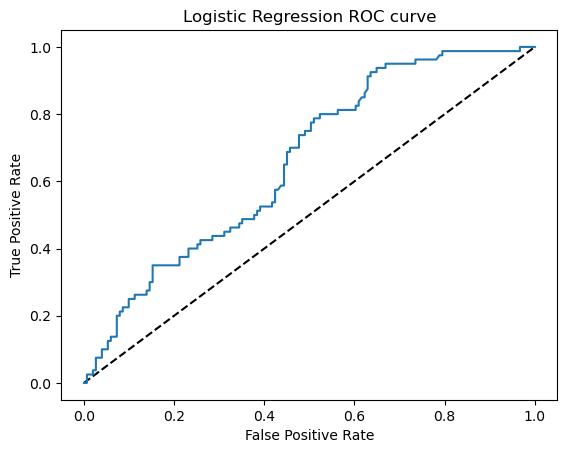

In [16]:
# general approach to using Logistic regression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logreg = LogisticRegression()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# we can use the predict_proba method to predict probabilities
# this method returns a two dimensional array with the negative and positive probabilities for a given test observation
# selecting the second column returns the positive class probabilities 
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# plotting the ROC curve
from sklearn.metrics import roc_curve

# fpr = false positive rate, tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()



In [17]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.6591059602649006
[[122  29]
 [ 52  28]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       151
           1       0.49      0.35      0.41        80

    accuracy                           0.65       231
   macro avg       0.60      0.58      0.58       231
weighted avg       0.63      0.65      0.63       231



### Hyperparameter tuning
Used to optimise model performance.

Ridge/lasso regression: Alpha
KNN: n_neighbors

One method of hyperparameter tuning is called Grid search. Here we specify a grid of possible values to try as part of the tuning process.

In [21]:
# GridSearchCV inh scitkit learn
# first import the library
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Ridge
import numpy as np

# instantiate kfold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify names and values of hyperparameters we want to tune as the keys and values of a dictionary
param_grid = {"alpha": np.arange(0.0001, 1, 10),
             "solver": ["sag", "lsqr"]}

# instantiate our model
ridge = Ridge()

# call gridsearch and pass it our model, the param grid, and set the cf argument to kf
ridge_cv = GridSearchCV(ridge, param_grid, cv = kf)

# this returns a grid search object which we can then fit to the training data
ridge_cv.fit(X_train, y_train)

# we can now print the models best parameters as identified by the model
print(ridge_cv.best_params_, ridge_cv.best_score_)



{'alpha': 0.0001, 'solver': 'sag'} 0.17325608988685093


This approach does not scale well though. If we attempt 3 fold CV, with 3 hyperparameters and 30 total values we would need to fit 900 models.

There is an alternative.

RandomisedSearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter = 2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.1732534854297989


In [23]:
# evaluate on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.015691136515049053


In [11]:
Tv = {'BreakingBad':100, 'GameOfThrones':1292, 'TMKUC' : 88}
 
Keymax = max(zip(Tv.values(), Tv.keys()))[1]
print(Keymax)


GameOfThrones
